<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [75]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Inspecting dataframe

In [4]:
#read the data frame and inspect
df = pd.read_csv("Country-data.csv")

In [5]:
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


##### Observation
The data frame has 9 columns. The country name is the only object data type. The rest of the columns are numerical. There are no null values present. 167 records are present. 

In [7]:
#Inspecting the statistical parameters of the columns
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Converting Columns

In [8]:
#Converting the columns as per the data given about the data set 
#The columns exports,imports and health are represented as % of gdpp
df.exports = df.exports*df.gdpp/100
df.imports = df.imports*df.gdpp/100
df.health = df.health*df.gdpp/100

In [9]:
#Inspecting the statistical parameters of the columns
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### Observation
Columns child_mort, exports, imports, gdp, and total_fer have outliers. The univariate analysis is done to inspect each of the columns as below.

## Univariate Analysis

In [10]:
columns = list(df.columns)
num_columns=columns

In [11]:
#Considering only numeric columns
num_columns.remove("country")

In [12]:
num_columns

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

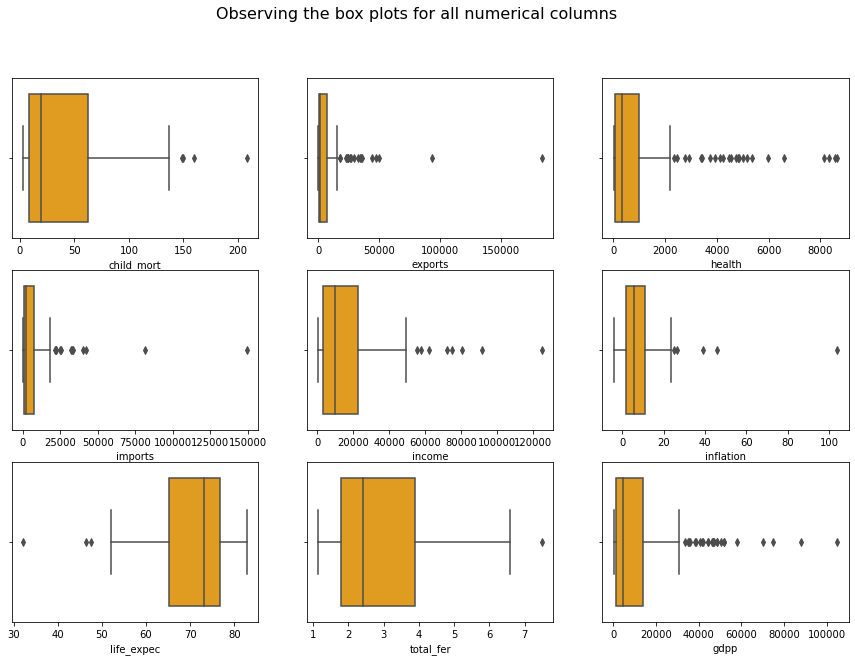

In [13]:
#One glance numerical columns distribution
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15, 10))

for col,i in zip(num_columns,range(1,len(num_columns)+1)):
    plt.subplot(3,3,i)
    sns.boxplot(df[col],color='orange')
plt.suptitle("Observing the box plots for all numerical columns",fontsize=16);      

##### Observation 
1. Child mortality is very high in a few countries it cannot be considered as outliers since they may be countries that need the funds.
2. In columns like income, gdpp, exports and imports the outliers are soft capped since if theses are showing a high number; it means indirectly that the countries may not be requiring monetary funds.
3. Life expectancy has outliers below the 25 percentile. These may be countries which need help to better their healthcare facilities.  Hence they are also not removed.


### Handling Outliers
The columns like income,imports exports and gdp have outliers that are greater than Q3. They are soft capped instead of deleting them as we have very few records.

In [14]:

# soft capping (statistical) outliers
# Columns gdpp, income, exports and imports which have outliers greater tha 99 percentile they are soft capped to 99percentile
for col in ["gdpp","exports","imports","income"]:
    Q3 = df[col].quantile(0.99)
    df[col][df[col]>Q3] = Q3
#     IQR = Q3 - Q1
#     df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]



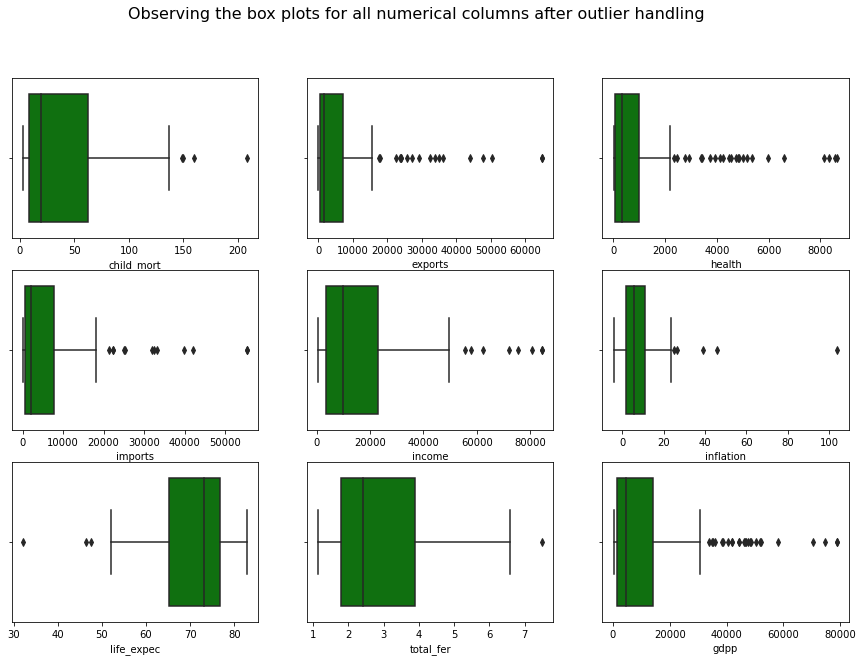

In [15]:
#One glance numerical columns distribution
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15, 10))

for col,i in zip(num_columns,range(1,len(num_columns)+1)):
    plt.subplot(3,3,i)
    sns.boxplot(df[col],color='green')
plt.suptitle("Observing the box plots for all numerical columns after outlier handling",fontsize=16); 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


## Scaling
The standard scaler is used to scale the numerical columns

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_columns])
# The scaler returns a  numpy object which has to be explicitly casted to a dataframe
df_scaled = pd.DataFrame(df_scaled)

In [18]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.569622,-0.565040,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.439218,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.484826,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.532363,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178771,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


## Hopkins Test

In [19]:
#Hopkins test to see if clustering is possible
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [20]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df_scaled)

0.8887309778938077

## Modelling

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [22]:
### k-means with some arbitrary k
from sklearn.cluster import KMeans
chosen_clusters =4
kmeans = KMeans(n_clusters=chosen_clusters, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [23]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 3, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 2, 1, 1, 3, 2, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 3, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

### Choosing the right K

### Elbow Curve Method

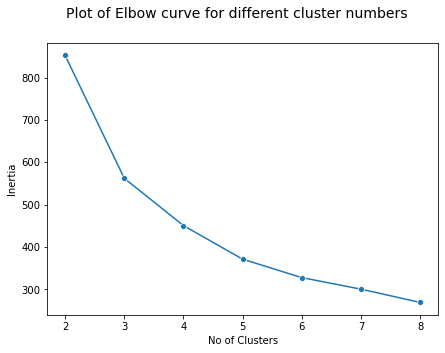

In [24]:
## Finding the Optimal Number of Clusters

### SSD

# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd

# plt.plot(ssd)
plt.figure(figsize=(7,5))
ax= sns.lineplot(y=ssd,x= range_n_clusters,marker='o')
ax.set(xlabel='No of Clusters', ylabel='Inertia');
plt.suptitle("Plot of Elbow curve for different cluster numbers",fontsize=14);

###### Observation
From the above graph the inertia reduces sharply at 3 clusters or in other words the elbow of this graph is at 3 hence we will choose 3 or 4 as the number of clusters.
Below the silhoutte analysis is done to cross verify the number of clusters required for this model.

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [25]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg_list=[]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    silhouette_avg_list.append(silhouette_avg)
    

For n_clusters=2, the silhouette score is 0.47836991760560543
For n_clusters=3, the silhouette score is 0.4224078601707397
For n_clusters=4, the silhouette score is 0.4081398018579549
For n_clusters=5, the silhouette score is 0.4145948046409389
For n_clusters=6, the silhouette score is 0.31574306499482896
For n_clusters=7, the silhouette score is 0.30011016450591443
For n_clusters=8, the silhouette score is 0.32027088751175253


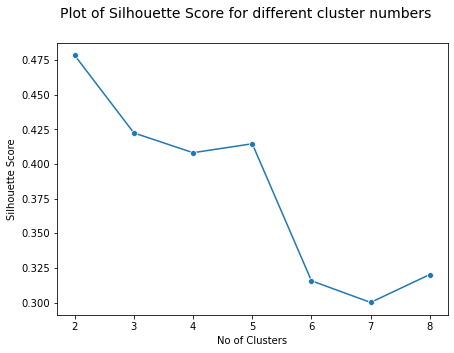

In [26]:
# plt.plot(ssd)
plt.figure(figsize=(7,5))
ax= sns.lineplot(y=silhouette_avg_list,x= range_n_clusters,marker='o')
ax.set(xlabel='No of Clusters', ylabel='Silhouette Score');
plt.suptitle("Plot of Silhouette Score for different cluster numbers",fontsize=14);

###### Observation 
The sillhoutte score reduces with 6 clusters hence reassuring that 3 or 4 clusters is the most appropriate number of clusters

### Kmeans method with number of clusters = 3

In [27]:
# final model with k=3
chosen_clusters =3
kmeans = KMeans(n_clusters=chosen_clusters, max_iter=50,random_state=0)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [28]:
# assign the label
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


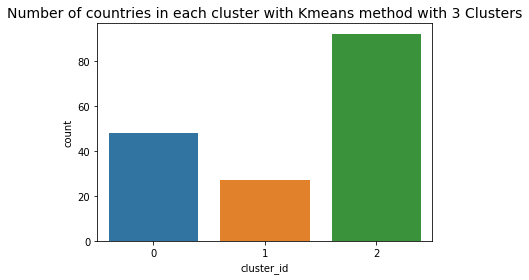

In [29]:
plt.title("Number of countries in each cluster with Kmeans method with 3 Clusters",fontsize=14)
sns.countplot(df['cluster_id']);

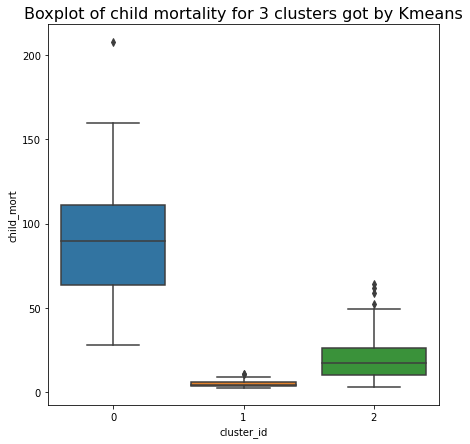

In [30]:
# plot
plt.figure(figsize=(7,7))
plt.title("Boxplot of child mortality for 3 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="child_mort", data=df);

##### Observation
Cluster 0 has the highest child mortality rate. There is a slight overlap of clusters 1 and 2 and the whiskers of cluster 0 and 2. 

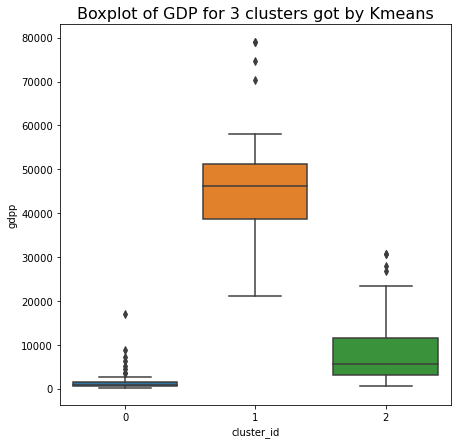

In [31]:
plt.figure(figsize=(7,7))
plt.title("Boxplot of GDP for 3 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="gdpp", data=df);

##### Observation
Cluster 0 has the lowest gdpp. There is a slight overlap of clusters 1 and 2 and the whiskers of cluster 0 and 2.

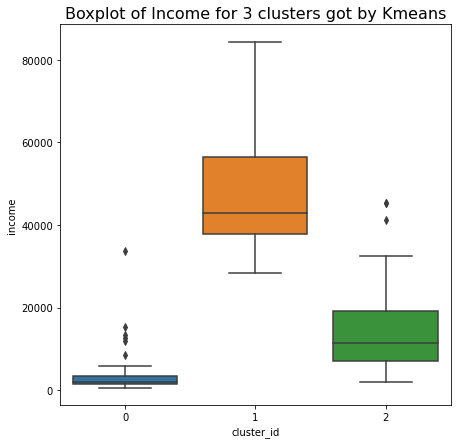

In [32]:
plt.figure(figsize=(7,7))
plt.title("Boxplot of Income for 3 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="income", data=df);

##### Observation
Cluster 0 has the lowest income. Looking at the boxplots above countries in cluster 0 need the aid.

In [33]:
#Contries that need aid
df[df.cluster_id == 0].country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [34]:
len(df[df.cluster_id == 0].country)

48

###### Observation
When the number of clusters is chosen to be 3 there is a slight overlap of boxes in the boxplot as seen above. There seems to be some more room for better clustering with 4 clusters. 

### Hierarchical Clustering

In [35]:
#importing libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Single Linkage

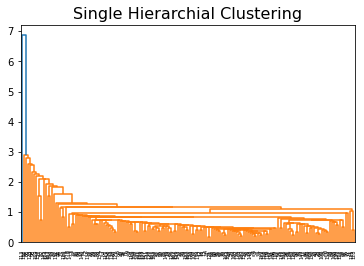

In [36]:
# single linkage
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.title("Single Hierarchial Clustering",fontdict={"size":16})
plt.show()

#####  Observation
The single linkage does not show a very clear clustering hence complete linkage for hierarchial clustering will be considered.

#### Complete Linkage

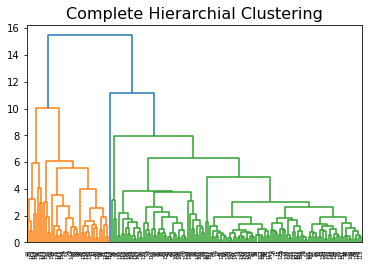

In [37]:
# complete linkage
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.title("Complete Hierarchial Clustering",fontdict={"size":16})
plt.show()

### Hierarchial method with number of clusters = 3

In [38]:
# 3 clusters are chosen to keep the analysis comparable to the Kmeans clustering
chosen_clusters = 3
cluster_labels = cut_tree(mergings, n_clusters=chosen_clusters).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0


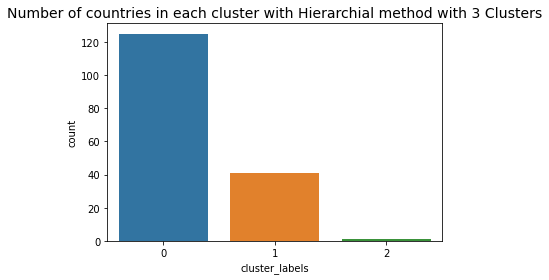

In [40]:
plt.title("Number of countries in each cluster with Hierarchial method with 3 Clusters",fontsize=14)
sns.countplot(df['cluster_labels']);

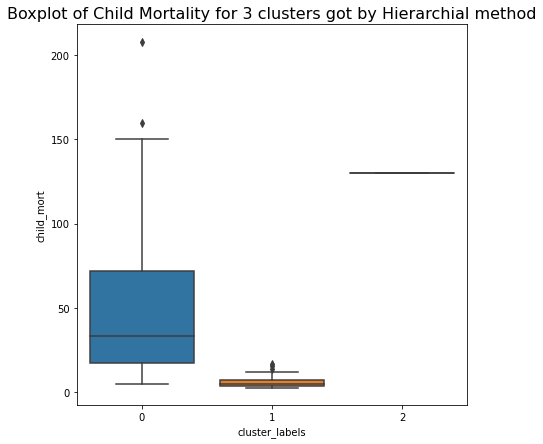

In [41]:
# plot
plt.figure(figsize=(7,7))
sns.boxplot(x='cluster_labels',y="child_mort", data=df)
plt.title("Boxplot of Child Mortality for 3 clusters got by Hierarchial method",fontdict={"size":16});

## Observation 
Cluster 2 and 0 have the highest child mortality rate. There is a overlap among clusters 0 and 2. There is very small number  countries in cluster 2.

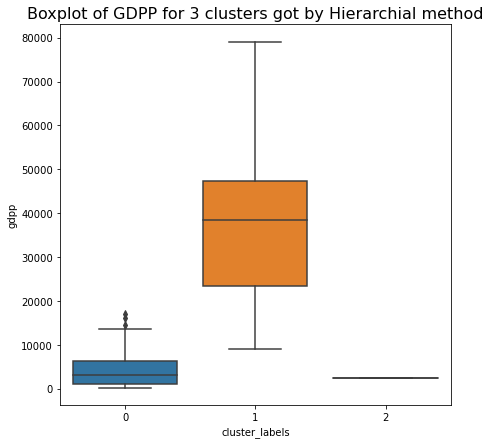

In [42]:
plt.figure(figsize=(7,7))
sns.boxplot(x='cluster_labels',y="gdpp", data=df)
plt.title("Boxplot of GDPP for 3 clusters got by Hierarchial method",fontdict={"size":16});

##### Observation 
Cluster 2 and 0 have the lowest gdp. There is a overlap among clusters 0 and 2. There is very small number  countries in cluster 2.

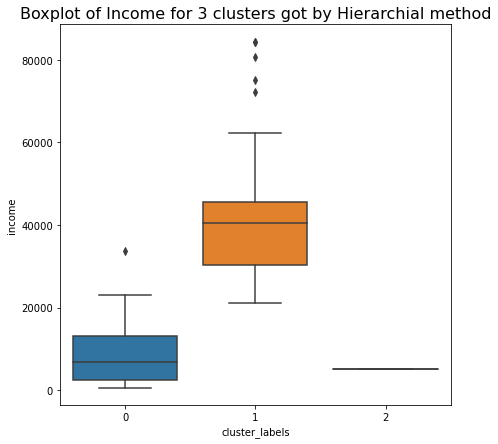

In [43]:
plt.figure(figsize=(7,7))
sns.boxplot(x='cluster_labels',y="income", data=df)
plt.title("Boxplot of Income for 3 clusters got by Hierarchial method",fontdict={"size":16});

## Observation 
Cluster 2 and 0 have the lowest income. There is a overlap among clusters 0 and 2.

In [44]:
len(df[df.cluster_labels == 2])

1

In [45]:
len(df[df.cluster_labels == 0])

125

###### Observation
With the herachial method with the number of clusters are chosen to be 3 there is a overlap of boxes in the boxplot as seen above. Cluster 2 looks like the cluster of countries that need aid but there is only one country in that cluster and next cluster that needs aid is cluster 0 which has 125 countries which is too large a number. There seems to be some more room for better clustering with 4 clusters. 

## Kmeans and Hierarchial  methods with 3 clusters are visually compared

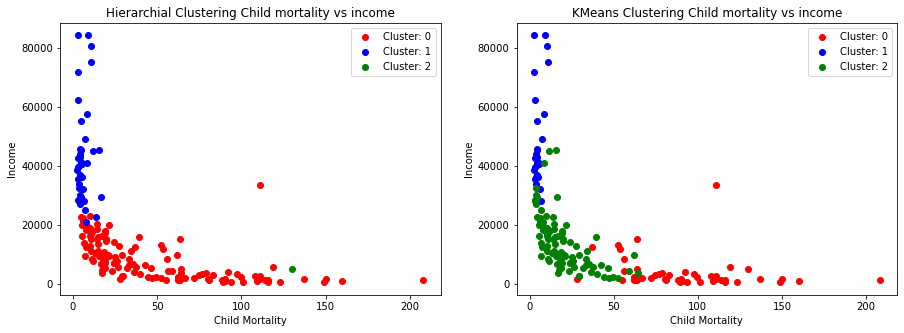

In [46]:
##### Plotting both Hierarchial clustering and Kmeans clustering graphs to see if there is a visible difference
color=['r','b','g','orange']
clusters= df.cluster_id.unique()
plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
ax.title.set_text("Hierarchial Clustering Child mortality vs income")
ax.set_xlabel("Child Mortality")
ax.set_ylabel("Income")

for k in range(chosen_clusters):
    p1 = plt.scatter(df[df.cluster_labels == k].child_mort, df[df.cluster_labels == k].income,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1)  
ax=plt.subplot(1,2,2)
ax.title.set_text("KMeans Clustering Child mortality vs income")
ax.set_xlabel("Child Mortality")
ax.set_ylabel("Income")

for k in range(chosen_clusters):
    p2 = plt.scatter(df[df.cluster_id == k].child_mort, df[df.cluster_id == k].income,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1);

##### Observation
The clustering done by Kmeans method seems to be having a better segregation of the clusters compared to the hierarchical method.   Cluster 0 in Kmeans method has the highest child mortality rate and low income. Hierarchial method has only one country in cluster 2 and 125 in cluster 0.

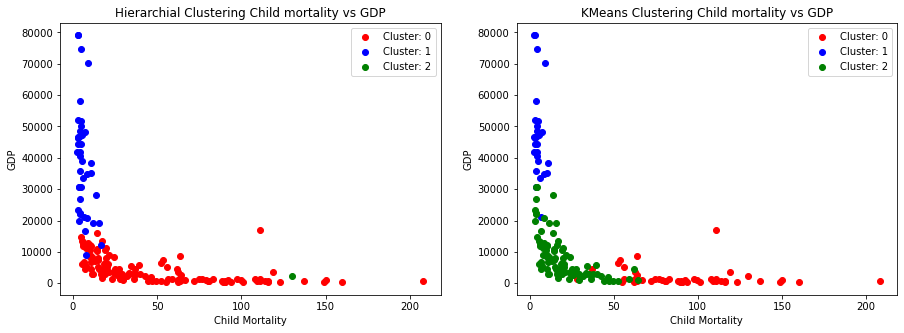

In [47]:
##### Plotting both Hierarchial clustering and Kmeans clustering graphs to see if there is a visible difference
color=['r','b','g','orange']
plt.figure(figsize=(15,5))
ax=plt.subplot(1,2,1)
ax.title.set_text("Hierarchial Clustering Child mortality vs GDP")
ax.set_xlabel("Child Mortality")
ax.set_ylabel("GDP")
for k in range(chosen_clusters):
    plt.scatter(df[df.cluster_labels == k].child_mort, df[df.cluster_labels == k].gdpp,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1)  
        
ax=plt.subplot(1,2,2)
ax.title.set_text("KMeans Clustering Child mortality vs GDP")
ax.set_xlabel("Child Mortality")
ax.set_ylabel("GDP")
for k in range(chosen_clusters):
    plt.scatter(df[df.cluster_id == k].child_mort, df[df.cluster_id == k].gdpp,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1);
   

##### Observation
The clustering done by Kmeans method seems to be having a better segregation of the clusters compared to the hierarchical method.   Cluster 0 in Kmeans method has the highest child mortality rate and low GDP. 

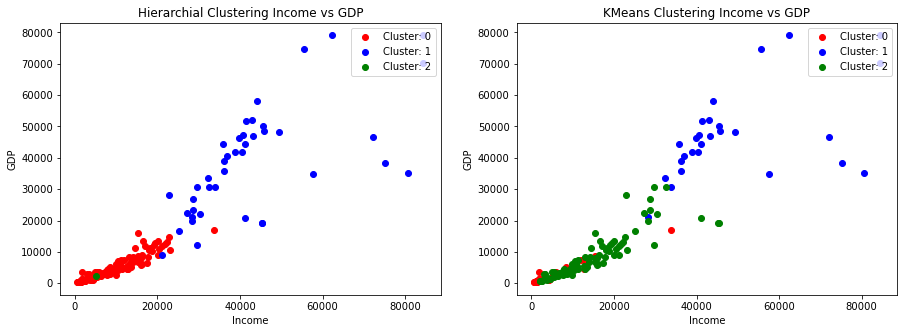

In [48]:
##### Plotting both Hierarchial clustering and Kmeans clustering graphs to see if there is a visible difference
color=['r','b','g','orange']
plt.figure(figsize=(15,5))
ax=plt.subplot(1,2,1)
ax.title.set_text("Hierarchial Clustering Income vs GDP")
ax.set_xlabel("Income")
ax.set_ylabel("GDP")
for k in range(chosen_clusters):
    plt.scatter(df[df.cluster_labels == k].income, df[df.cluster_labels == k].gdpp,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1)  
    
ax=plt.subplot(1,2,2)
ax.title.set_text("KMeans Clustering Income vs GDP")
ax.set_xlabel("Income")
ax.set_ylabel("GDP")
for k in range(chosen_clusters):
    plt.scatter(df[df.cluster_id == k].income, df[df.cluster_id == k].gdpp,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1) ; 


##### Observation
The clustering done by Kmeans method seems to be having a better segregation of the clusters compared to the hierarchical method.   Cluster 0 in Kmeans method has the lowest income and low GDP. 

### Kmeans with number of clusters = 4

In [49]:
# final model with k=4
chosen_clusters =4
kmeans = KMeans(n_clusters=chosen_clusters, max_iter=50,random_state=0)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=0)

In [50]:
# assign the label
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


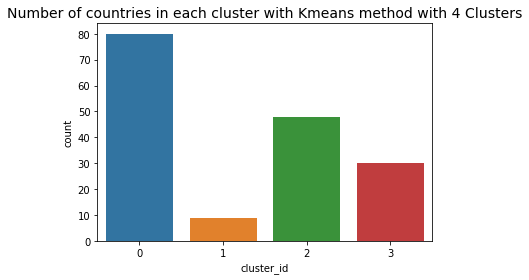

In [51]:
plt.title("Number of countries in each cluster with Kmeans method with 4 Clusters",fontsize=14)
sns.countplot(df['cluster_id']);

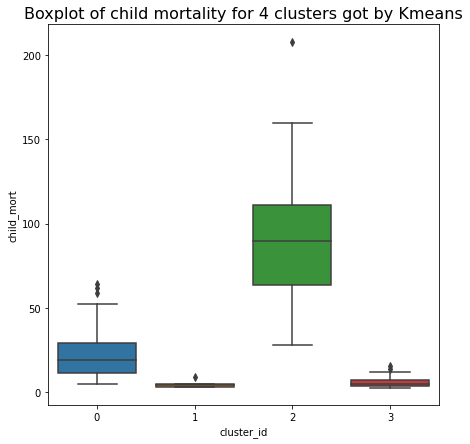

In [52]:
# plot
plt.figure(figsize=(7,7))
plt.title("Boxplot of child mortality for 4 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="child_mort", data=df);

##### Observation 
Cluster 2 has the highest child mortality rate.

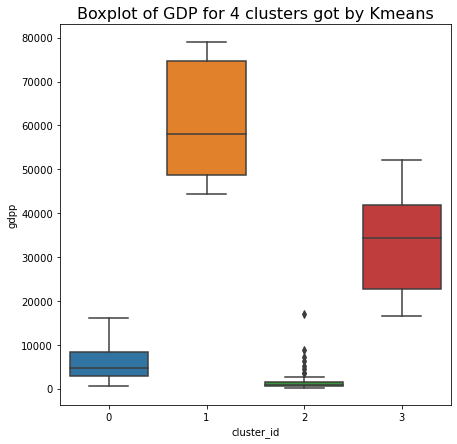

In [53]:
plt.figure(figsize=(7,7))
plt.title("Boxplot of GDP for 4 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="gdpp", data=df);

##### Observation 
Cluster 2 has the lowest GDPP. There is a clear demarkation of the clusters there is a slight overlap with just the whiskers of the boxes.

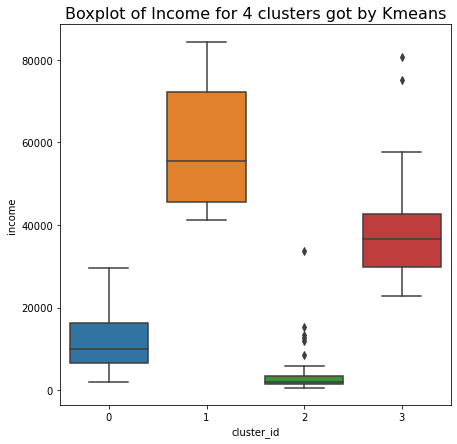

In [54]:
plt.figure(figsize=(7,7))
plt.title("Boxplot of Income for 4 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="income", data=df);

##### Observation 
Cluster 2 has the lowest income. There is a clear demarkation of the clusters there is a slight overlap with just the whiskers of the boxes.

The countries in cluster 2 hence need the aid the most according to Kmeans clustering.

In [55]:
#Countries that need aid by clustering using Kmeans method
df[df.cluster_id == 2].country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [56]:
len(df[df.cluster_id == 2].country)

48

### Hierarchial Method with number of clusters = 4

In [57]:
# 4 clusters are chosen to keep the analysis comparable to the Kmeans clustering
chosen_clusters =4
cluster_labels = cut_tree(mergings, n_clusters=chosen_clusters).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [58]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


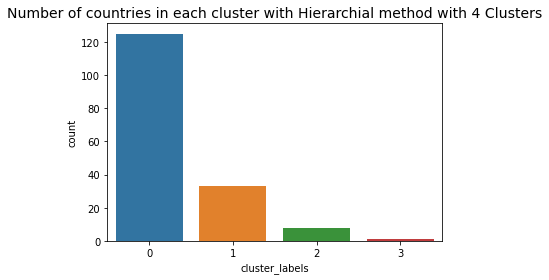

In [59]:
plt.title("Number of countries in each cluster with Hierarchial method with 4 Clusters",fontsize=14)
sns.countplot(df['cluster_labels']);

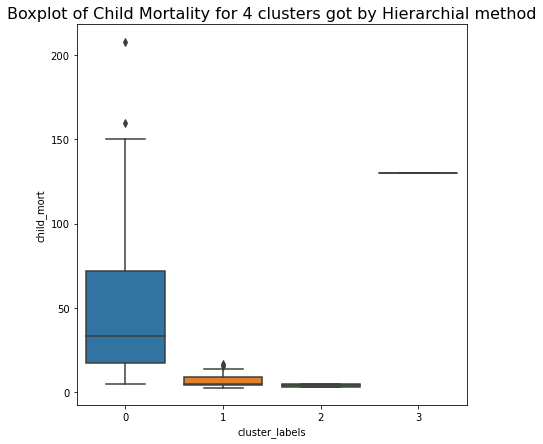

In [60]:
# plot
plt.figure(figsize=(7,7))
sns.boxplot(x='cluster_labels',y="child_mort", data=df)
plt.title("Boxplot of Child Mortality for 4 clusters got by Hierarchial method",fontdict={"size":16});

### Observation 
Cluster 3 and 0 have the highest child mortality rate. There is a overlap among clusters 0 and 3.

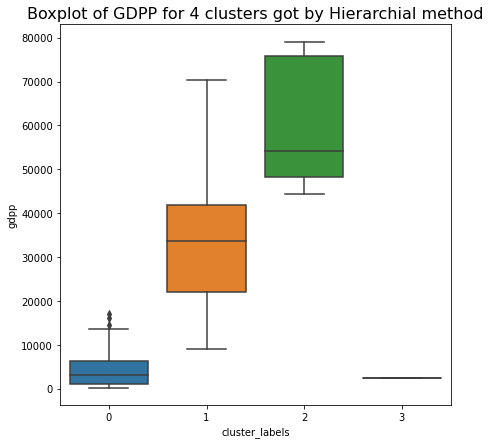

In [61]:
plt.figure(figsize=(7,7))
sns.boxplot(x='cluster_labels',y="gdpp", data=df)
plt.title("Boxplot of GDPP for 4 clusters got by Hierarchial method",fontdict={"size":16});

### Observation 
Cluster 3 and 0 have the lowest gdp. There is a overlap among clusters 0 and 3.

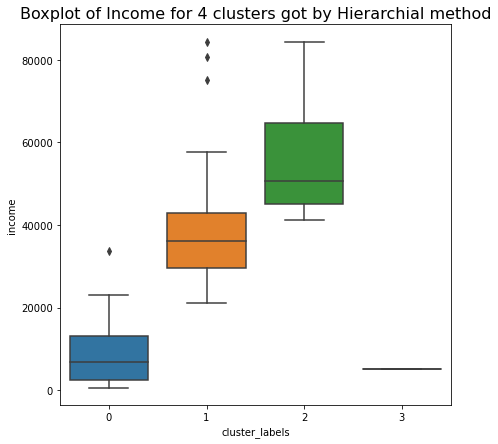

In [62]:
plt.figure(figsize=(7,7))
sns.boxplot(x='cluster_labels',y="income", data=df)
plt.title("Boxplot of Income for 4 clusters got by Hierarchial method",fontdict={"size":16});

### Observation 
Cluster 3 and 0 have the lowest income. There is a overlap among clusters 0 and 3.

In [63]:
#Countries that need aid by using Hierarchial method in cluster 0
df[df.cluster_labels == 3].country

113    Nigeria
Name: country, dtype: object

In [64]:
#Countries that need aid by using Hierarchial method in cluster 3
df[df.cluster_labels == 0].country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 125, dtype: object

### Observation 
The number of countries in cluster 3 is only Nigeria and hence cluster 0 was also examined. The number of countries are 125 hence not a very intutive cluster since the total number of countries is itslef only 167.

Below both Kmeans and Hierarchial clusters are visually compared.

## Kmeans and Hierarchial  methods with 4 clusters are visually compared

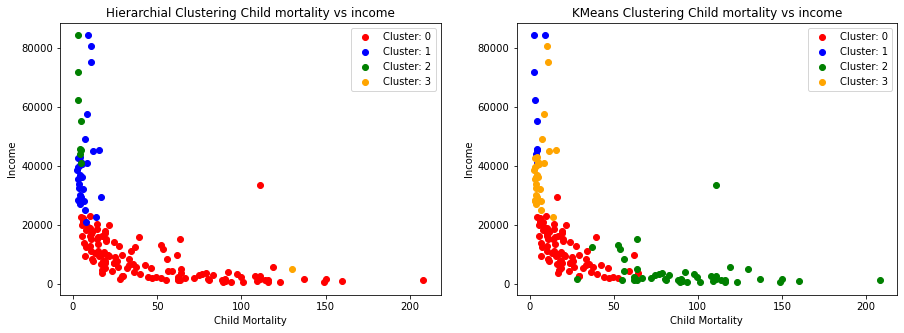

In [65]:
##### Plotting both Hierarchial clustering and Kmeans clustering graphs to see if there is a visible difference
color=['r','b','g','orange']
clusters= df.cluster_id.unique()
plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
ax.title.set_text("Hierarchial Clustering Child mortality vs income")
ax.set_xlabel("Child Mortality")
ax.set_ylabel("Income")

for k in range(chosen_clusters):
    p1 = plt.scatter(df[df.cluster_labels == k].child_mort, df[df.cluster_labels == k].income,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1)  
ax=plt.subplot(1,2,2)
ax.title.set_text("KMeans Clustering Child mortality vs income")
ax.set_xlabel("Child Mortality")
ax.set_ylabel("Income")

for k in range(chosen_clusters):
    p2 = plt.scatter(df[df.cluster_id == k].child_mort, df[df.cluster_id == k].income,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1);

##### Observation
The clustering done by Kmeans method seems to be having a better segregation of the clusters compared to the hierarchical method.   Cluster 2 in Kmeans method has the highest child mortality rate and low income. 

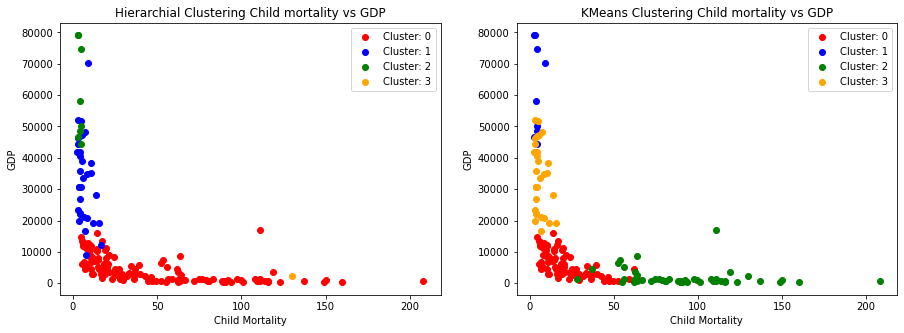

In [66]:
##### Plotting both Hierarchial clustering and Kmeans clustering graphs to see if there is a visible difference
color=['r','b','g','orange']
plt.figure(figsize=(15,5))
ax=plt.subplot(1,2,1)
ax.title.set_text("Hierarchial Clustering Child mortality vs GDP")
ax.set_xlabel("Child Mortality")
ax.set_ylabel("GDP")
for k in range(chosen_clusters):
    plt.scatter(df[df.cluster_labels == k].child_mort, df[df.cluster_labels == k].gdpp,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1)  
        
ax=plt.subplot(1,2,2)
ax.title.set_text("KMeans Clustering Child mortality vs GDP")
ax.set_xlabel("Child Mortality")
ax.set_ylabel("GDP")
for k in range(chosen_clusters):
    plt.scatter(df[df.cluster_id == k].child_mort, df[df.cluster_id == k].gdpp,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1);
   

##### Observation
The clustering done by Kmeans method seems to be having a better segregation of the clusters compared to the hierarchical method.   Cluster 2 in Kmeans method has the highest child mortality rate and low GDP. 

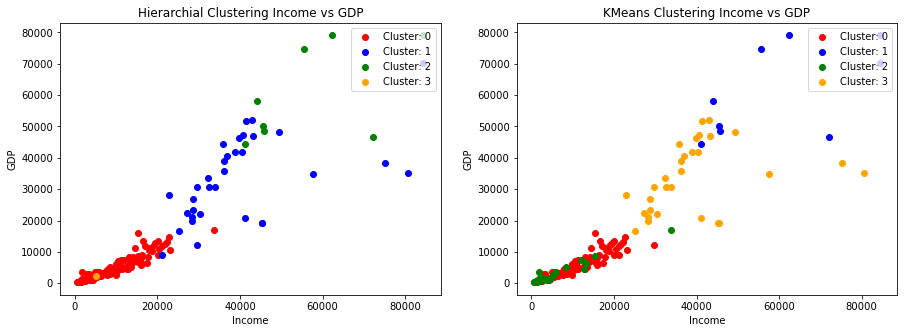

In [67]:
##### Plotting both Hierarchial clustering and Kmeans clustering graphs to see if there is a visible difference
color=['r','b','g','orange']
plt.figure(figsize=(15,5))
ax=plt.subplot(1,2,1)
ax.title.set_text("Hierarchial Clustering Income vs GDP")
ax.set_xlabel("Income")
ax.set_ylabel("GDP")
for k in range(chosen_clusters):
    plt.scatter(df[df.cluster_labels == k].income, df[df.cluster_labels == k].gdpp,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1)  
    
ax=plt.subplot(1,2,2)
ax.title.set_text("KMeans Clustering Income vs GDP")
ax.set_xlabel("Income")
ax.set_ylabel("GDP")
for k in range(chosen_clusters):
    plt.scatter(df[df.cluster_id == k].income, df[df.cluster_id == k].gdpp,c=color[k],label="Cluster: "+str(k))
ax.legend(loc=1) ; 


##### Observation
The clustering done by Kmeans method seems to be having a better segregation of the clusters compared to the hierarchical method.   Cluster 2 in Kmeans method has the lowest income and low GDP. 

## Conclusion
The clustering method by Kmeans gave better clustering of countries as compared to Hierarchial method. The scatter plots for Kmeans with 4 clusters show that there is a better clustering with 4 clusters than 3 clusters. Hence the number of clusters are finalised as 4 and the shortlisting is done from the countries in cluster 2 of Kmeans clustering.

## Countries that need aid

In [68]:
#Checking the number of Countries that need aid got by clustering using KMeans method
countries_aid_Kmeans = df[df.cluster_id == 2].country
len(countries_aid_Kmeans)

48

In [69]:
#Checking the number of Countries that need aid got by clustering using Hierarchial method
countries_aid_Hierarchial1 = df[df.cluster_labels == 3].country
len(countries_aid_Hierarchial1)

1

In [70]:
#Checking the number of Countries that need aid got by clustering using Hierarchial method
countries_aid_Hierarchial2 = df[df.cluster_labels == 0].country
len(countries_aid_Hierarchial2)

125

##### Observation
The countries got by clustering using Kmeans is considered. The conclusion was arrived by lookins=g at the graphs comapring the hierarchial and Kmeans methods and listing the number of countries as in previous cells.Hence countries are better clustered with Kmeans method.

In [71]:
aid_reqd_df = df[df.country.isin(countries_aid_Kmeans)]
aid_reqd_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,2,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,2,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,2,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,2,0


In [72]:
# Sorting the countries in descending order of child mortality and ascending order of life expectancy
aid_reqd_df_sorted = aid_reqd_df.sort_values(by =['child_mort','income','gdpp'], ascending=[False, True, True])

In [76]:
# List of 10 countries that have been shortlisted

aid_reqd_df_sorted.head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,2,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897.0,2,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708.0,2,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,104.00,60.5,5.84,2330.0,2,3
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,2,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,2,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.81,57.9,5.87,575.0,2,0


In [74]:
aid_reqd_df_sorted.country.head(5)

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object

##  List of 5 countries that have been shortlisted
1. Haiti, 
2. Sierra Leone 
3. Chad
4. Central African Republic
5. Mali